In [1]:
# Uso de GLPK en R
# Ver ejemplo en página 16
# http://lipas.uwasa.fi/~tsottine/lecture_notes/or.pdf

# Ver también
# http://lipas.uwasa.fi/~tsottine/or_with_octave/or_with_octave.pdf
#
# Es necesario instalar Rglpk ver siguiente enlace
# https://r-forge.r-project.org/R/?group_id=96
# install.packages('devtools') #assuming it is not already installed
# library(devtools)
# install_github('andreacirilloac/updateR')
# library(updateR)
# updateR(admin_password = 'Admin user password')
# update.packages()
# install.packages("slam")
# install.packages("Rglpk", repos="http://R-Forge.R-project.org")

In [1]:
# Cargar librería Rglpk
library("Rglpk")
# Construir Programa Lineal
obj<-c(4,3) # Función Objetivo
mat <- matrix(c(2, 3, -3, 2, 0, 2, 2, 1), nrow = 4, byrow = T) # Matriz tecnológica
dirR <- c("<=", "<=", "<=", "<=") # Dirección de las restricciones
types <- c("C", "C") # Tipo de variables de decisión (continuas)
rhs <- c(6,3,5,4) # Lado derecho de las restricciones
sol <- Rglpk_solve_LP(obj, mat, dirR, rhs, types, max = TRUE)
sol
# Interprete los resultados

Loading required package: slam
Using the GLPK callable library version 4.60


$optimum
[1] 9

$solution
[1] 1.5 1.0

$status
[1] 0

$solution_dual
[1] 0 0

$auxiliary
$auxiliary$primal
[1]  6.0 -2.5  2.0  4.0

$auxiliary$dual
[1] 0.5 0.0 0.0 1.5

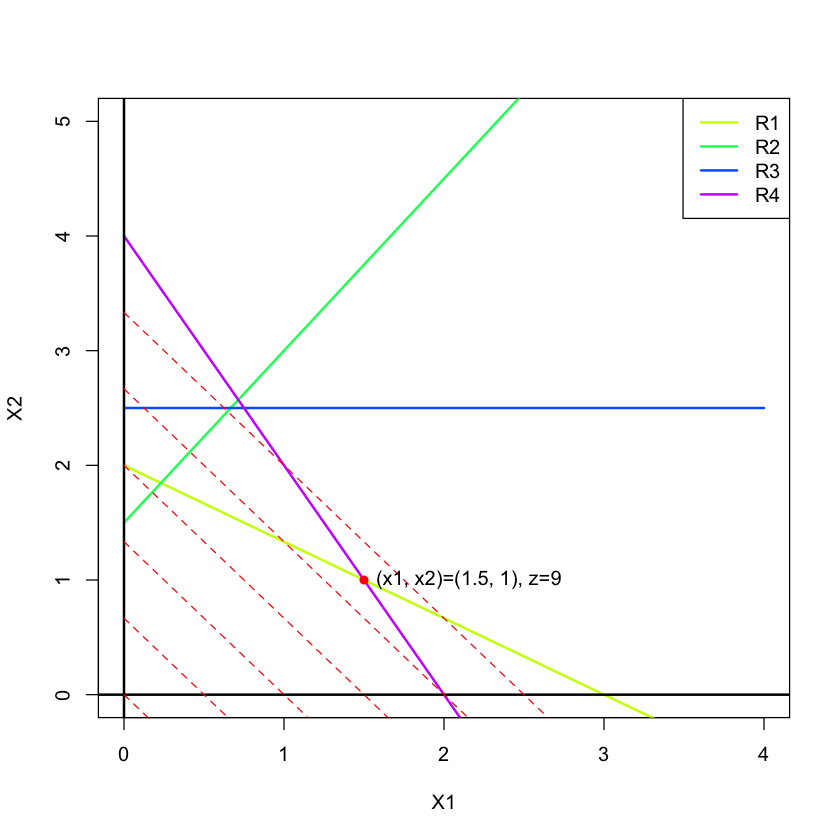

In [2]:
# Representación gráfica del problema
# Definimos un rango para x1
x1=seq(0,4,by=0.1)
# Evaluavos x2 de cada restricción para los valores de x1
R1 <- (6-2*x1)/3
R2 <- (3+3*x1)/2
R3 <- rep(1, length(x1))*5/2
R4 <- 4 - 2*x1
# Construimos un dataframe con estos valores
PL<-data.frame(x1, R1, R2, R3, R4)
r <- dim(PL)[2]
cl <- rainbow(r)
# Construimos un gráfico nuevo (type="n") especificadndo límites en x y y
plot(0,0,xlim = c(0,4),ylim = c(0,5),type = "n", xlab="X1", ylab="X2")
for (i in 2:r) {
    lines(PL[,1], PL[,i], col=cl[i], type="l", lwd=2)
}
abline(v=0, lwd=2)
abline(h=0, lwd=2)
c<-seq(0,10,by=2)
for (i in 1:length(c)) {
    x2_z <- (c[i] - 4*x1)/3
    lines(PL[,1], x2_z, lty=2, col=cl[1])
}
legend("topright", names(PL)[2:r], col=cl[2:r], lwd=2)
# Es necesario ejecutar Rglpk para crear el objeto "sol" 
# Obtemos la solución para x1 y x2
x1 <- sol$solution[1]
x2 <- sol$solution[2]
# Construimos texto para mostrar en el gráfico
texto <- paste(c("(x1, x2)=(",
                 toString(x1),
                 ", ", 
                 toString(x2), 
                 "), z=", 
                 toString(sol$optimum)), 
               collapse="")
# Graficamos el punto óptimo
lines(x1, x2, lwd=2, type="p", col=cl[1], pch=16)
# Mostramos el texto construido anteriormente
text(x1, x2, texto, pos=4)